In [111]:
###**********************************************Import******************************************************************###
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
cd desktop\Eastern Work\Eastern Work 3\Intro to Data Science

[WinError 3] The system cannot find the path specified: 'desktop\\Eastern Work\\Eastern Work 3\\Intro to Data Science'
C:\Users\Donyewakefield\desktop\Eastern Work\Eastern Work 3\Intro to Data Science


In [113]:
vgs_data1 = pd.read_csv("vgs.csv")

In [125]:
###**********************************************Data Cleaning**********************************************************###
vgs_data2 = pd.DataFrame(vgs_data1)
vgs_data3 = vgs_data2[vgs_data2.notnull()]
vgs_big = vgs_data3.dropna() #Decided to drop the observations with missing values altogether
#Create a new data frame with specific variables and cleaned User_Score (all values set to numeric values)
vgs_big_Name = pd.Series(vgs_big["Name"])
vgs_big_Global_Sales = pd.Series(vgs_big["Global_Sales"])
vgs_big_Critic_Score = pd.Series(vgs_big["Critic_Score"])
vgs_big_User_Score1 = pd.Series(vgs_big["User_Score"])
vgs_big_User_Score = pd.to_numeric(vgs_big_User_Score1)
vgs = pd.DataFrame({'Name':vgs_big_Name,
              'Global_Sales':vgs_big_Global_Sales,
             'Critic_Score':vgs_big_Critic_Score,
             'User_Score':vgs_big_User_Score,
                   })
vgs.head()


,Name,Global_Sales,Critic_Score,User_Score
0,Wii Sports,82.53,76.0,8.0
2,Mario Kart Wii,35.52,82.0,8.3
3,Wii Sports Resort,32.77,80.0,8.0
6,New Super Mario Bros.,29.80,89.0,8.5
7,Wii Play,28.92,58.0,6.6


In [115]:
###**********************************************Exploratory Analysis****************************************************###
vgs.describe() 

,Global_Sales,Critic_Score,User_Score
count,6825.000000,6825.000000,6825.000000
mean,0.777590,70.272088,7.185626
std,1.963443,13.868572,1.439942
min,0.010000,13.000000,0.500000
25%,0.110000,62.000000,6.500000
50%,0.290000,72.000000,7.500000
75%,0.750000,80.000000,8.200000
max,82.530000,98.000000,9.600000


C:\Users\Donyewakefield\Downloads\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Donyewakefield\Downloads\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


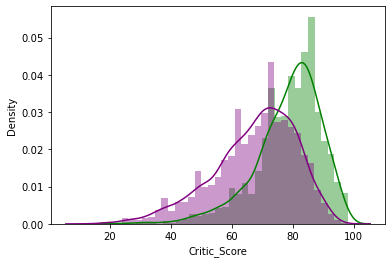

In [117]:
###How distict are the 2 distributions?
##Split the data into 2 subportions of data (1 for games above average in sales, and 1 below average in sales)
below_ave = vgs.loc[vgs["Global_Sales"] <= 0.777590]#these are the games that are below the average in terms of global sales in terms of global sales
above_ave = vgs.loc[vgs["Global_Sales"] > 0.777590] #the average amount for Global_Sales is the threshold, these are above average games
##Make comparison between both groups- Looking at Critic_Score first
print(sns.distplot(above_ave['Critic_Score'], color = 'green'))
print(sns.distplot(below_ave['Critic_Score'], color = 'purple'))

C:\Users\Donyewakefield\Downloads\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Donyewakefield\Downloads\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


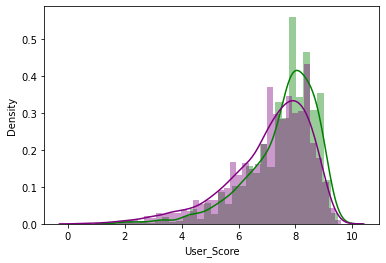

In [118]:
##Make comparison between both groups- Looking at User_Score second
print(sns.distplot(above_ave['User_Score'], color = 'green'))
print(sns.distplot(below_ave['User_Score'], color = 'purple'))

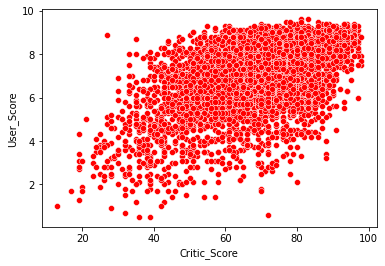

The correlation is:  0.5803183710099145


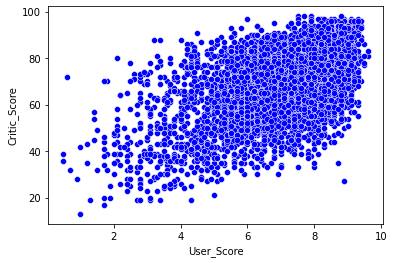

The correlation is:  0.5803183710099145


In [128]:
###Is there a relationship between Critic_Score and User_Score?
sns.scatterplot(x = 'Critic_Score', y = 'User_Score', color = 'red', data = vgs) #Positively correlated relationship (strong)
plt.show()
print("The correlation is: ", vgs.corr()['Critic_Score']['User_Score'])
sns.scatterplot(x = 'User_Score', y = 'Critic_Score', color = 'blue', data = vgs) #Positively correlated relationship (strong)
plt.show() 
print("The correlation is: ", vgs.corr()['User_Score']['Critic_Score'])

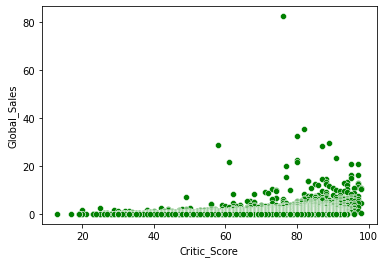

The correlation is:  0.2375557222827404


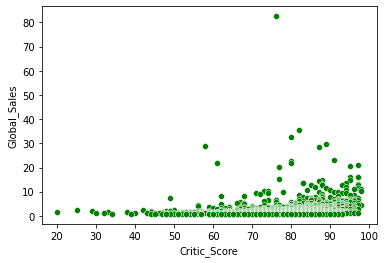

The correlation is:  0.17739953376060136


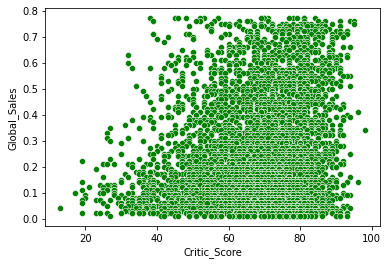

The correlation is:  0.1950778854361977


In [120]:
###What is the direct relationship between Critic Score and Global Sales?
##General correlation 
sns.scatterplot(x = 'Critic_Score', y = 'Global_Sales', color = 'green', data = vgs) #Weak
plt.show()
print("The correlation is: ",vgs.corr()['Critic_Score']['Global_Sales'])
##Narrowed data correlation
sns.scatterplot(x = 'Critic_Score', y = 'Global_Sales', color = 'green', data = above_ave) #Weak
plt.show()
print("The correlation is: ",above_ave.corr()['Critic_Score']['Global_Sales'])
sns.scatterplot(x = 'Critic_Score', y = 'Global_Sales', color = 'green', data = below_ave) #Weak
plt.show()
print("The correlation is: ", below_ave.corr()['Critic_Score']['Global_Sales'])

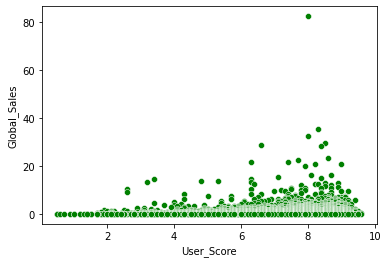

The correlation is:  0.0883485263469673


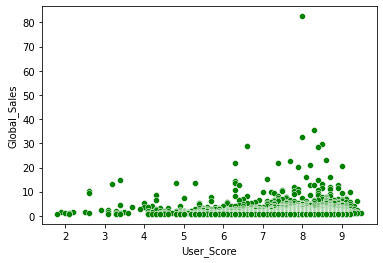

The correlation is:  0.03600658423627041


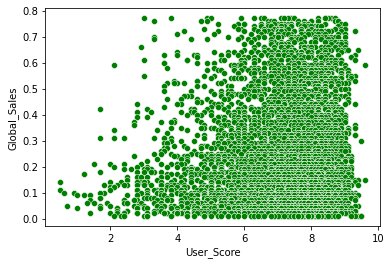

The correlation is:  0.09777832741330572


In [121]:
###What is the direct relationship between User Score and Global Sales?
##General correlation 
sns.scatterplot(x = 'User_Score', y = 'Global_Sales', color = 'green', data = vgs) #Weak
plt.show()
print("The correlation is: ", vgs.corr()['User_Score']['Global_Sales'])
##Narrowed data correlation
sns.scatterplot(x = 'User_Score', y = 'Global_Sales', color = 'green', data = above_ave) #Weak
plt.show()
print("The correlation is: ", above_ave.corr()['User_Score']['Global_Sales'])
sns.scatterplot(x = 'User_Score', y = 'Global_Sales', color = 'green', data = below_ave) #Weak
plt.show()
print("The correlation is: ", below_ave.corr()['User_Score']['Global_Sales'])